<a href="https://colab.research.google.com/github/tensorvijay/Driftscan/blob/master/galaxymorphology_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All libraries will come here


In [ ]:
import glob as glob # helps in saving the files
import numpy as np
import seaborn as sns
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import paired_cosine_distances
import PIL.Image as im
from sklearn.decomposition import FastICA

from sklearn import mixture

In [ ]:
!unzip '/content/drive/My Drive/galaxy/images_training_rev1 (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926426.jpg  
  inflating: images_training_rev1/926435.jpg  
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_training_rev1/926655.jpg  
  inflati

In [ ]:

files_train= glob.glob('../content/images_training_rev1/*.jpg')

In [ ]:
files_array=np.asarray(files_train)

In [ ]:
files_array.reshape(-1,1)

array([['../content/images_training_rev1/730449.jpg'],
       ['../content/images_training_rev1/910485.jpg'],
       ['../content/images_training_rev1/373020.jpg'],
       ...,
       ['../content/images_training_rev1/208787.jpg'],
       ['../content/images_training_rev1/164513.jpg'],
       ['../content/images_training_rev1/180357.jpg']], dtype='<U42')

In [ ]:
np.save('/content/drive/My Drive/galaxy/files_array.npy',files_array)

In [ ]:
files_load=np.load('/content/drive/My Drive/galaxy/files_array.npy') #load from saved space
#array=load_resall.astype('int32')

In [ ]:
files_load.dtype

dtype('<U42')

In [ ]:
def readImage(address):
    x = im.open(address)
    x = np.array(x)
    return(x)

In [ ]:
image=readImage(files_load[1])


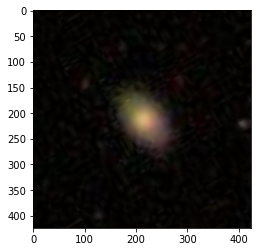

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(424, 424, 3)

In [ ]:
graydet = rgb2gray(image)

In [ ]:
graydet.shape

(424, 424)

In [ ]:
np.linalg.det(graydet)

0.0

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
gc=gini(graydet)
gc

0.6194807967922814

In [ ]:
image.shape

(424, 424, 3)

In [ ]:
gauss=graydet.reshape(len(graydet)*len(graydet))

In [ ]:
uni,occ=np.unique(gauss,return_counts=True)

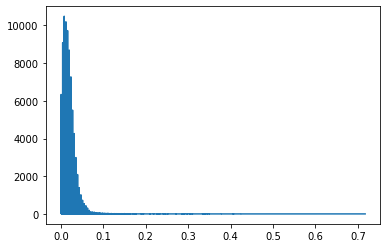

In [ ]:
plt.plot(uni,occ)

In [ ]:
gauss.mean()

0.0393019039008893

In [ ]:
np.median(gauss)

0.019875686274509804

In [ ]:
np.linalg.matrix_rank(graydet)

424

In [ ]:
graydet

array([[0.01595412, 0.01987569, 0.02771882, ..., 0.02771882, 0.03164039,
        0.03556196],
       [0.01595412, 0.01987569, 0.02379725, ..., 0.02771882, 0.03164039,
        0.03556196],
       [0.01203255, 0.01595412, 0.02379725, ..., 0.02771882, 0.03164039,
        0.03556196],
       ...,
       [0.00811098, 0.00811098, 0.00811098, ..., 0.03137255, 0.03921569,
        0.04313725],
       [0.00811098, 0.00811098, 0.00811098, ..., 0.03529412, 0.04313725,
        0.05098039],
       [0.00811098, 0.00811098, 0.00811098, ..., 0.03921569, 0.04705882,
        0.05490196]])

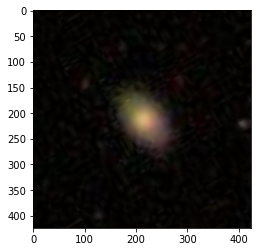

In [ ]:
plt.imshow(image) #check if ordering of image has changed or not

In [ ]:

def pcashape(image,thres):    #arrange as number of components
  gim = rgb2gray(image)
  #thresh = threshold_otsu(gim)
  #binary = gim_286947 > thresh
  #plt.imshow(binary,cmap='binary')
  pca=PCA(n_components=thres)
  shaped=pca.fit_transform(gim)
  return np.size(shaped,axis=1)

In [ ]:
resall=np.zeros_like(files_train)
for i in range (len(files_train)):
  image=readImage(files_train[i])
  resall[i]=pcashape(image,0.99)

In [ ]:
resall.shape

(61578,)

In [ ]:
np.save('/content/drive/My Drive/galaxy/components1.npy',resall)

In [ ]:
load_resall=np.load('/content/drive/My Drive/galaxy/components1.npy')

In [ ]:
array=load_resall.astype('int32')

In [ ]:
array.shape

(61578,)

In [ ]:
X=array.reshape(-1,1)
X.shape

(61578, 1)

In [ ]:
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=50, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [ ]:
F=clust.labels_

In [ ]:
uni,occ=np.unique(F,return_counts=True)

In [ ]:
plot(uni,occ)

array([  195, 61383])

In [ ]:
plot(array,F)

In [ ]:
clust.labels_.shape

(61578,)

In [ ]:
uni

array([-1,  0])

In [ ]:
from sklearn import mixture

In [ ]:
clustering = AgglomerativeClustering().fit(X)


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:796: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, ensure_min_samples=2, estimator=self)


In [ ]:
 brc = Birch(n_clusters=3)

In [ ]:
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [ ]:
labels=brc.labels_

In [ ]:
uni,occ=np.unique(labels,return_counts=True)

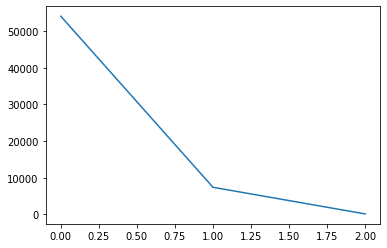

In [ ]:
plt.plot(uni,occ)

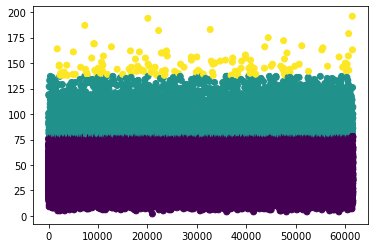

In [ ]:
plt.scatter(yy,array,c=labels)

In [ ]:
array

array([ 53,  22,  19, ..., 100,  67,  37], dtype=int32)

In [ ]:
array[61577]

37

In [ ]:
xx=np.linspace(0,1,61578)
yy=np.arange(0,len(array))

In [ ]:
yy

array([    0,     1,     2, ..., 61575, 61576, 61577])

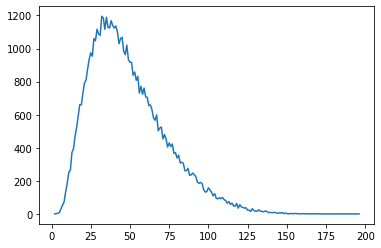

In [ ]:
uniqueValues, occurCount = np.unique(array, return_counts=True)
plt.plot(uniqueValues,occurCount)

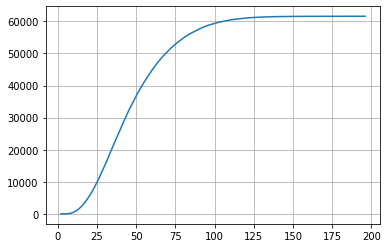

In [ ]:
dist=np.cumsum(occurCount)
plt.grid(True)
plt.plot(uniqueValues,dist)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

<Figure size 864x864 with 0 Axes>

In [ ]:
files_load

array(['../content/images_training_rev1/730449.jpg',
       '../content/images_training_rev1/910485.jpg',
       '../content/images_training_rev1/373020.jpg', ...,
       '../content/images_training_rev1/208787.jpg',
       '../content/images_training_rev1/164513.jpg',
       '../content/images_training_rev1/180357.jpg'], dtype='<U42')

In [ ]:
lis_25=[]

In [ ]:
for i in range (0,len(array)):
 if (array[i]<26):
  lis_25.append(i)

In [ ]:
len(lis_25)

9799

In [ ]:
comp_25=array[lis_25]  #number of components for the first set of 25  component class

In [ ]:
comp_25.max()

25

In [ ]:

lis_img_25=files_load[lis_25] #list of images which have number of components less than 25

In [ ]:
lis_img_25

array(['../content/images_training_rev1/910485.jpg',
       '../content/images_training_rev1/373020.jpg',
       '../content/images_training_rev1/989505.jpg', ...,
       '../content/images_training_rev1/587551.jpg',
       '../content/images_training_rev1/367466.jpg',
       '../content/images_training_rev1/584591.jpg'], dtype='<U42')

In [ ]:
files_load

array(['../content/images_training_rev1/730449.jpg',
       '../content/images_training_rev1/910485.jpg',
       '../content/images_training_rev1/373020.jpg', ...,
       '../content/images_training_rev1/208787.jpg',
       '../content/images_training_rev1/164513.jpg',
       '../content/images_training_rev1/180357.jpg'], dtype='<U42')

In [ ]:
lis_25[1]

2

In [ ]:
test_y = np.array([
            np.int64(lis_img_25[galaxy_id].split('/')[-1].split('.')[0])
                    for galaxy_id in range(0,len(lis_img_25))]) #test label

In [ ]:
test_y

array([910485, 373020, 989505, ..., 587551, 367466, 584591])

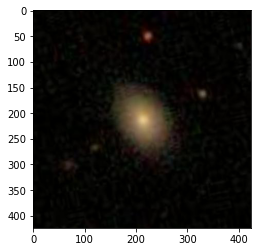

In [ ]:
img=readImage(lis_img_25[3])
plt.imshow(img)

In [ ]:
def pcadet(image,comp):   #function that returns the hald square rectangle
 image=readImage(image)   #failed task , unablle to draw any significant difference interms of distance
 gim = rgb2gray(image)
 pca=PCA(n_components=comp)
 shaped=pca.fit_transform(gim)
 pca2=PCA(n_components=int(comp/2))
 shaped1=pca2.fit_transform(shaped.T)
 return shaped1.T

In [ ]:
(1/25)*0.70

0.027999999999999997

Develop algorithm for weighted average of the cosine similar components with weighted average.

In [ ]:
def pcaeig(image,comp):
  image=readImage(image)
  gim=rgb2gray(image)
  pca=PCA(n_components=comp)
  shaped=pca.fit_transform(gim)
  return shaped.T

In [ ]:
def image(image):
  image=readImage(image)
  gim=rgb2gray(image)
  return gim

In [ ]:
img_25_list=[]
L=len(lis_img_25)
for i in range(0,L):
 img=image(lis_img_25[i])
 img_25_list.append(img)

In [ ]:
shape1=pcaeig(lis_img_25[1],25)
shape2=pcaeig(lis_img_25[2],25)

In [ ]:
shape1

array([[-0.7449567 , -0.73769245, -0.72859254, ..., -0.79454539,
        -0.79104518, -0.78692295],
       [-0.37510449, -0.36769805, -0.35786855, ..., -0.36354028,
        -0.36453874, -0.36455192],
       [-0.06720744, -0.07414976, -0.07942604, ..., -0.0709025 ,
        -0.06544794, -0.06741915],
       ...,
       [ 0.02560474,  0.02252882,  0.02018364, ..., -0.00720837,
        -0.0104683 , -0.01524571],
       [-0.0508831 , -0.03969928, -0.02375126, ...,  0.03072668,
         0.03016236,  0.03191978],
       [-0.00673191, -0.0082247 , -0.01155402, ..., -0.07546747,
        -0.07769813, -0.07855948]])

In [ ]:
cosine(shape1[1],s)

In [ ]:
weight=np.linspace(0.95,0.10,25)
s=np.sum(weight)
wt=((1/20)*weight)/s
wt

array([0.00361905, 0.00348413, 0.00334921, 0.00321429, 0.00307937,
       0.00294444, 0.00280952, 0.0026746 , 0.00253968, 0.00240476,
       0.00226984, 0.00213492, 0.002     , 0.00186508, 0.00173016,
       0.00159524, 0.00146032, 0.0013254 , 0.00119048, 0.00105556,
       0.00092063, 0.00078571, 0.00065079, 0.00051587, 0.00038095])

In [ ]:
def normalise(vec):
  s=np.sum(vec)
  return vec/s

In [ ]:
weight=weight.reshape(-1,1)

In [ ]:
sim=np.zeros(len(shape1))
sim=sim.reshape(-1,1)

In [ ]:
sim.shape

(25, 1)

In [ ]:
eigenlist_25=[]
L=len(lis_img_25)
for i in range(0,L):
 eigenlist_25.append(pcaeig(lis_img_25[i],25))

In [ ]:
np.save('/content/drive/My Drive/galaxy/eigenlist_25.npy',eigenlist_25)

NameError: ignored

In [ ]:
#avgc=(comp_25[1]+comp_25[2])/2
def similarity(shape1,shape2):
 sim=np.zeros(len(shape1))
 sim=sim.reshape(-1,1)
 for i in range(0,len(shape1)):
  sim[i]=cosine(shape1[i],shape2[i])
 return sim.mean()

In [ ]:
L=len(lis_img_25)
dist_test=np.zeros([10,10])   #the cosine similarity matrix
for i in range(0,10):
  shape1=pcaeig(lis_img_25[i],1)
  for j in range(i+1,10):
   shape2=pcaeig(lis_img_25[j],1)
   sim=similarity(shape1,shape2)
   dist_test[i,j]=sim

In [ ]:
dist_test

array([[0.        , 0.97054396, 0.98505537, 0.99447975, 0.95873435,
        0.97361845, 0.96362464, 0.94618097, 0.95836023, 1.00065023],
       [0.        , 0.        , 0.88974179, 1.03039747, 0.98045089,
        0.96253813, 1.01373557, 0.94283977, 0.97330329, 1.03722396],
       [0.        , 0.        , 0.        , 0.9379564 , 0.96108945,
        0.95790615, 0.94555541, 0.884588  , 0.9660382 , 0.99188096],
       [0.        , 0.        , 0.        , 0.        , 0.91954325,
        0.95695399, 0.95566212, 0.99542205, 0.96244133, 0.93515814],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.99797554, 0.93480168, 0.93615766, 0.98627083, 0.98170774],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.97812705, 0.9225817 , 0.9902468 , 0.9556317 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.92192328, 1.01006348, 0.99395392],
       [0.        , 0.        , 0.       

In [ ]:
np.save('/content/drive/My Drive/galaxy/dist_test.npy',dist_test)

In [ ]:
len(lis_img_25)

NameError: ignored

In [ ]:
sym=dist_test+dist_test.T
sym-sym.T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
sym

array([[0.        , 0.97054396, 0.98505537, 0.99447975, 0.95873435,
        0.97361845, 0.96362464, 0.94618097, 0.95836023, 1.00065023],
       [0.97054396, 0.        , 0.88974179, 1.03039747, 0.98045089,
        0.96253813, 1.01373557, 0.94283977, 0.97330329, 1.03722396],
       [0.98505537, 0.88974179, 0.        , 0.9379564 , 0.96108945,
        0.95790615, 0.94555541, 0.884588  , 0.9660382 , 0.99188096],
       [0.99447975, 1.03039747, 0.9379564 , 0.        , 0.91954325,
        0.95695399, 0.95566212, 0.99542205, 0.96244133, 0.93515814],
       [0.95873435, 0.98045089, 0.96108945, 0.91954325, 0.        ,
        0.99797554, 0.93480168, 0.93615766, 0.98627083, 0.98170774],
       [0.97361845, 0.96253813, 0.95790615, 0.95695399, 0.99797554,
        0.        , 0.97812705, 0.9225817 , 0.9902468 , 0.9556317 ],
       [0.96362464, 1.01373557, 0.94555541, 0.95566212, 0.93480168,
        0.97812705, 0.        , 0.92192328, 1.01006348, 0.99395392],
       [0.94618097, 0.94283977, 0.884588 

In [ ]:
check=np.multiply((1/20)*weight,sim)
check.mean()

0.02247209000463533

In [ ]:
for i in range(0,len(shape1)):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
np.dot(shape1[1],shape1[2])

-1.6629059240713673e-14

In [ ]:
check=pcadet(img,24)

In [ ]:
dist_met=np.zeros([10,10])

In [ ]:
dist_met

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
pca2=PCA(n_components=12)
shaped1=pca2.fit_transform(shaped.T)

In [ ]:
shaped1.shape
v1=shaped1.T

In [ ]:
mat=np.vstack((v1,v1))

In [ ]:
val=np.linalg.det(mat)

In [ ]:
val

0.0

In [ ]:
dist_test=np.zeros([10,10])
for i in range(0,10):
  shape1=pcadet(lis_img_25[i],6)
  for j in range(i+1,10):
   shape2=pcadet(lis_img_25[j],6)
   stak=np.vstack((shape1,shape2))
   det=np.linalg.det(stak)
   #print(det)
   dist_test[i,j]=abs(det)

In [ ]:
symmet=dist_test+dist_test.T

In [ ]:
symmet-symmet.T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
symmet

array([[0.00000000e+00, 5.12408484e-13, 8.14325723e-14, 2.14115488e-14,
        8.52612171e-14, 1.89964943e-13, 5.00354904e-13, 4.56882658e-14,
        3.63070415e-15, 1.77117544e-14],
       [5.12408484e-13, 0.00000000e+00, 2.33969651e-14, 6.86288106e-14,
        9.85532681e-14, 1.82865140e-13, 3.80591604e-13, 8.32581763e-14,
        9.54176187e-13, 6.97661458e-14],
       [8.14325723e-14, 2.33969651e-14, 0.00000000e+00, 8.77394414e-14,
        2.64522947e-13, 4.33900916e-13, 1.47226194e-13, 2.36854085e-14,
        2.15512105e-13, 5.39035870e-14],
       [2.14115488e-14, 6.86288106e-14, 8.77394414e-14, 0.00000000e+00,
        1.66936281e-13, 1.33009094e-13, 6.38499297e-13, 1.15310140e-14,
        2.59168168e-14, 1.01451888e-13],
       [8.52612171e-14, 9.85532681e-14, 2.64522947e-13, 1.66936281e-13,
        0.00000000e+00, 1.16652023e-14, 2.51491008e-13, 2.98691895e-15,
        2.65324169e-14, 3.60025652e-15],
       [1.89964943e-13, 1.82865140e-13, 4.33900916e-13, 1.33009094e-13,
   

In [ ]:
shape1=pcadet(lis_img_25[1],6)
shape2=pcadet(lis_img_25[2],6)

In [ ]:
shape2.shape

(3, 6)

In [ ]:
shape1

array([[ 3.14498126e+01, -6.38383727e+00, -6.34972889e+00,
        -6.28091942e+00, -6.21889615e+00, -6.21643089e+00],
       [ 8.68270074e-03,  4.83942650e+00, -3.26039836e+00,
        -7.35675604e-01, -4.29547754e-01, -4.22487477e-01],
       [ 1.43547106e-02,  1.66295796e+00,  3.41345747e+00,
        -2.94677093e+00, -1.08542610e+00, -1.05857311e+00]])

In [ ]:
shape2

array([[ 2.69861746e+01, -5.40510158e+00, -5.39928733e+00,
        -5.39682439e+00, -5.39443763e+00, -5.39052370e+00],
       [ 4.87139071e-04,  1.84673619e+00, -7.69400870e-01,
        -4.80572219e-01, -3.52297118e-01, -2.44953122e-01],
       [ 2.37458247e-04,  2.24415043e-01,  1.46661571e+00,
        -1.08769858e+00, -4.04455979e-01, -1.99113650e-01]])

In [ ]:
stack=np.vstack((shape1,shape2))

In [ ]:
np.linalg.det(stack)

-2.3396965057167567e-14

In [ ]:
dist

array([7.73431527e-07, 4.95985413e-03, 1.75034557e-02, 3.05619053e-02,
       4.00109439e-02, 7.29394549e-03, 3.77091567e-02, 4.49730201e-02,
       7.84620670e-02, 5.26817949e-02, 3.29336679e-02, 3.42938365e-02])

In [ ]:
normalize(dist)

array([[2.33138397e-07, 3.01669263e-01, 3.01650741e-01, 3.01598041e-01,
        3.01505230e-01, 3.01445486e-01, 3.01478762e-01, 3.01462661e-01,
        3.01468645e-01, 3.01452973e-01, 3.01449705e-01, 3.01443160e-01],
       [3.00374444e-01, 1.49088557e-03, 3.29128405e-01, 3.00648344e-01,
        2.94442572e-01, 2.99819672e-01, 2.97608948e-01, 2.98183933e-01,
        2.96997324e-01, 2.99079915e-01, 2.99045352e-01, 2.99834455e-01],
       [3.13141027e-01, 2.85004740e-01, 5.48588004e-03, 2.75306538e-01,
        2.84569916e-01, 3.10844786e-01, 3.03925241e-01, 3.06473120e-01,
        3.03743189e-01, 3.09528459e-01, 3.09594434e-01, 3.11566784e-01],
       [3.05583361e-01, 3.11389502e-01, 3.48506562e-01, 9.34365072e-03,
        2.48196677e-01, 3.02361261e-01, 2.93769344e-01, 2.97191232e-01,
        2.94034164e-01, 3.01433211e-01, 3.01463420e-01, 3.03753220e-01],
       [2.85177804e-01, 2.91661563e-01, 3.01533354e-01, 3.37992567e-01,
        1.14106002e-02, 3.16904730e-01, 3.31396468e-01, 2.95

In [ ]:
check_dist=dist.astype('int32')

In [ ]:
check_dist

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]], dtype=int32)

In [ ]:
dist

array([[7.73431527e-07, 1.00078117e+00, 1.00071973e+00, 1.00054490e+00,
        1.00023700e+00, 1.00003880e+00, 1.00014919e+00, 1.00009578e+00,
        1.00011563e+00, 1.00006364e+00, 1.00005280e+00, 1.00003108e+00],
       [9.99280871e-01, 4.95985413e-03, 1.09493909e+00, 1.00019208e+00,
        9.79546815e-01, 9.97435264e-01, 9.90080663e-01, 9.91993514e-01,
        9.88045922e-01, 9.94974253e-01, 9.94859268e-01, 9.97484445e-01],
       [9.99119568e-01, 9.09346869e-01, 1.75034557e-02, 8.78403421e-01,
        9.07959503e-01, 9.91793095e-01, 9.69715334e-01, 9.77844690e-01,
        9.69134471e-01, 9.87593173e-01, 9.87803674e-01, 9.94096728e-01],
       [9.99524705e-01, 1.01851586e+00, 1.13992109e+00, 3.05619053e-02,
        8.11820086e-01, 9.88985622e-01, 9.60882542e-01, 9.72075108e-01,
        9.61748737e-01, 9.85950087e-01, 9.86048896e-01, 9.93538546e-01],
       [9.99967830e-01, 1.02270294e+00, 1.05731810e+00, 1.18516129e+00,
        4.00109439e-02, 1.11121739e+00, 1.16203225e+00, 1.03

In [ ]:
np.matmul(shape1[1],shape1[2])

4.0419056990259605e-16

In [ ]:
np.dot(shape1[1],shape1[4])-np.dot(shape1[1],shape1[1])

-87.60530479522538

In [ ]:
stak=np.vstack((shape1,shape1))
det=np.linalg.det(stak)
det

0.0

In [ ]:
symmet[1,1]

0.0

In [ ]:
check=normalize(symmet)

array([[0.00000000e+00, 4.61793177e-54, 1.36543878e-56, 5.23058955e-57,
        7.18732091e-55, 5.40494039e-54, 3.83643211e-52, 2.28339921e-55,
        2.47015226e-55, 2.71658794e-58],
       [4.61793177e-54, 0.00000000e+00, 4.09394476e-53, 1.95378183e-55,
        2.12767497e-51, 1.54002238e-52, 5.40524529e-50, 4.71924916e-55,
        2.68724013e-52, 4.03066620e-55],
       [1.36543878e-56, 4.09394476e-53, 0.00000000e+00, 1.04749906e-55,
        2.79030958e-54, 3.39175630e-53, 2.86527638e-55, 2.38447357e-54,
        7.05067759e-54, 2.08864893e-56],
       [5.23058955e-57, 1.95378183e-55, 1.04749906e-55, 0.00000000e+00,
        4.21036951e-54, 5.81307146e-56, 6.23106194e-55, 1.24099970e-56,
        2.43802471e-55, 8.69927079e-61],
       [7.18732091e-55, 2.12767497e-51, 2.79030958e-54, 4.21036951e-54,
        0.00000000e+00, 2.40080879e-53, 4.41334561e-52, 4.28820453e-53,
        2.00050949e-55, 1.00595966e-56],
       [5.40494039e-54, 1.54002238e-52, 3.39175630e-53, 5.81307146e-56,
   

In [ ]:
check=normalize(symmet)
check

array([[0.00000000e+00, 1.73135297e-02, 5.36083103e-02, 5.62788172e-04,
        1.62126604e-02, 7.36769603e-02, 9.95370066e-01, 1.81327694e-02,
        6.65665562e-03, 5.02722980e-04],
       [5.73242544e-03, 0.00000000e+00, 9.54736519e-01, 3.03255078e-03,
        1.57504510e-01, 5.80417723e-03, 2.52022575e-01, 1.22854102e-04,
        8.53142241e-03, 2.56593360e-03],
       [1.62754362e-02, 8.75449818e-01, 0.00000000e+00, 1.78589930e-02,
        1.86835077e-01, 3.01816870e-01, 2.10276551e-03, 7.15811634e-02,
        3.16118981e-01, 4.40853680e-02],
       [8.69397838e-03, 1.41491020e-01, 9.08719908e-01, 0.00000000e+00,
        3.90910285e-01, 3.47122705e-02, 3.89804975e-03, 2.99796014e-03,
        9.63632273e-03, 1.80920609e-05],
       [2.03745410e-02, 5.97824549e-01, 7.73377341e-01, 3.18007271e-02,
        0.00000000e+00, 1.60240085e-02, 4.81129275e-02, 2.01229949e-01,
        1.47671559e-04, 1.32357917e-03],
       [7.37825611e-02, 1.75553662e-02, 9.95554449e-01, 2.25025354e-03,
   

In [ ]:
val2=np.dot(shape1[1],shape1[2])
round(val2,10)

0.0

In [ ]:
val1=np.dot(shape1[1],shape2[3])
round(val1,10)

-0.0020919623

In [ ]:
valc=cosine(shape2[2],shape2[2])
valc

0.0

In [ ]:
valc

0.990080663114111